In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("mtcars.csv")
df.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [3]:
df.shape

(32, 12)

In [4]:
df.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of               car_model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Valiant 2  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
8               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4 

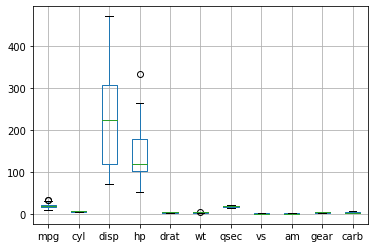

In [6]:
df.boxplot()

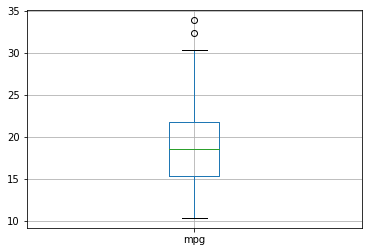

In [7]:
df[['mpg']].boxplot();

In [8]:
y=df.mpg

In [9]:
removed_outliers = y.between(y.quantile(0.05),y.quantile(0.9))

In [10]:
print(str(y[removed_outliers].size)+"/"+str(y.size)+" data point remain")

26/32 data point remain


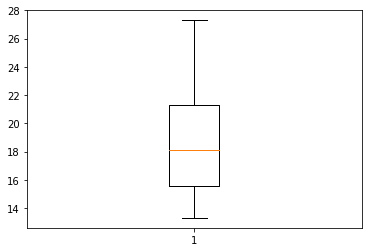

In [11]:
plt.boxplot(y[removed_outliers]);

Text(0.5, 1.0, 'Removed Outlier')

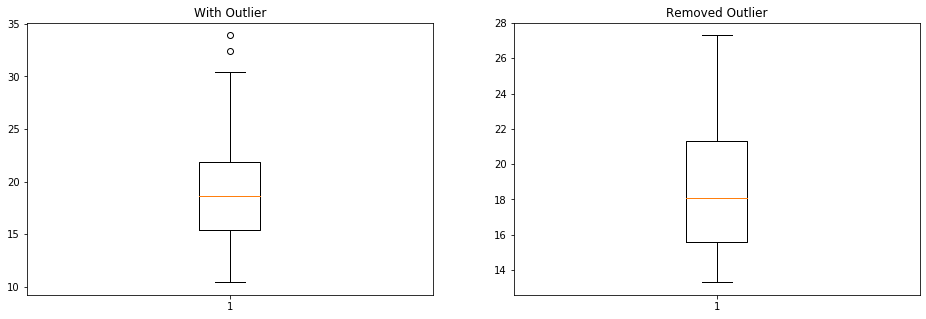

In [12]:
figure, ax = plt.subplots(1,2,figsize=(16,5))

ax[0].boxplot(y);
ax[1].boxplot(y[removed_outliers]);

ax[0].set_title("With Outlier")
ax[1].set_title("Removed Outlier")


In [13]:
df['clean_ol_mpg'] = y[removed_outliers]

In [14]:
df.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,clean_ol_mpg
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,21.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,21.4
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8


In [15]:
df.dropna(axis=0,how='any',inplace=True)

In [16]:
df.isnull().sum()

car_model       0
mpg             0
cyl             0
disp            0
hp              0
drat            0
wt              0
qsec            0
vs              0
am              0
gear            0
carb            0
clean_ol_mpg    0
dtype: int64

In [17]:
df.shape

(26, 13)

In [18]:
X = df[['hp','wt']]
y = df.clean_ol_mpg

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 2), (8, 2), (18,), (8,))

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = model.predict(X_test)

In [23]:
r2_score(y_test,y_pred)*100

66.87608313450622

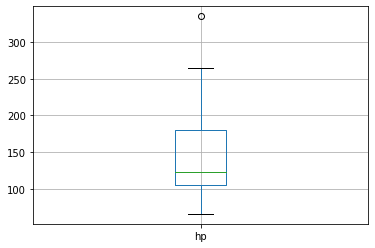

In [24]:
df[['hp']].boxplot();

In [25]:
X=df.hp

In [26]:
removed_outliers = X.between(X.quantile(0.05),X.quantile(0.95))

In [27]:
print(str(X[removed_outliers].size)+"/"+str(X.size)+" data point remain")

22/26 data point remain


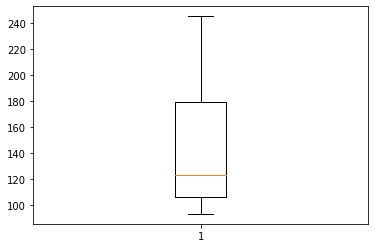

In [29]:
plt.boxplot(X[removed_outliers]);

Text(0.5, 1.0, 'Removed Outlier')

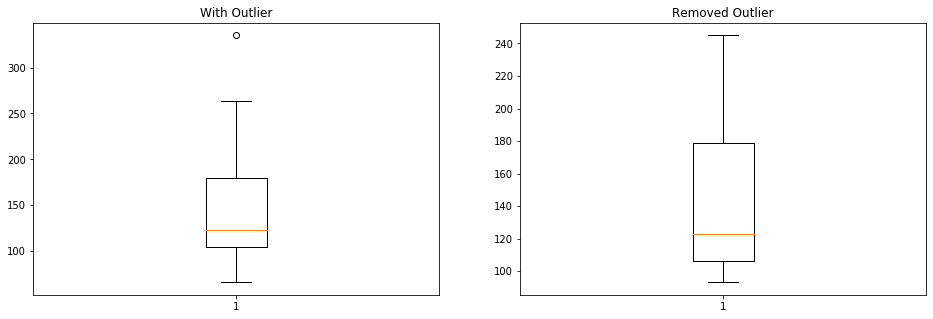

In [30]:
figure, ax = plt.subplots(1,2,figsize=(16,5))

ax[0].boxplot(X);
ax[1].boxplot(X[removed_outliers]);

ax[0].set_title("With Outlier")
ax[1].set_title("Removed Outlier")

In [31]:
df['clean_ol_hp'] = X[removed_outliers]

In [32]:
df.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,clean_ol_mpg,clean_ol_hp
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,21.0,110.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.0,110.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8,93.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,21.4,110.0
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8,93.0


In [33]:
df.dropna(axis=0,how='any',inplace=True)

In [34]:
df.isnull().sum()

car_model       0
mpg             0
cyl             0
disp            0
hp              0
drat            0
wt              0
qsec            0
vs              0
am              0
gear            0
carb            0
clean_ol_mpg    0
clean_ol_hp     0
dtype: int64

In [35]:
X = df[['clean_ol_hp','wt']]
y = df.clean_ol_mpg

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15, 2), (7, 2), (15,), (7,))

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_predict = model.predict(X_test)

In [52]:
r2_score(y_test,y_predict)*100

34.91267642124627

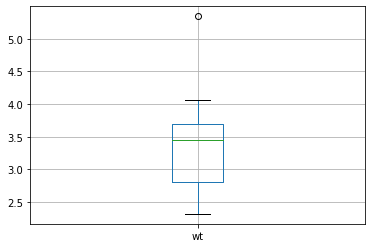

In [56]:
df[['wt']].boxplot();

In [53]:
X=df.wt

In [54]:
removed_outliers = X.between(X.quantile(0.05),X.quantile(0.95))

In [55]:
print(str(X[removed_outliers].size)+"/"+str(X.size)+" data point remain")

18/22 data point remain


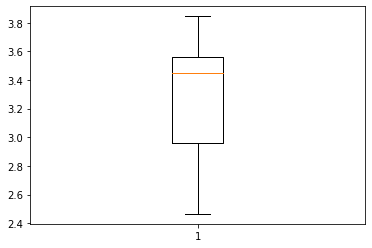

In [57]:
plt.boxplot(X[removed_outliers]);

Text(0.5, 1.0, 'Removed Outlier')

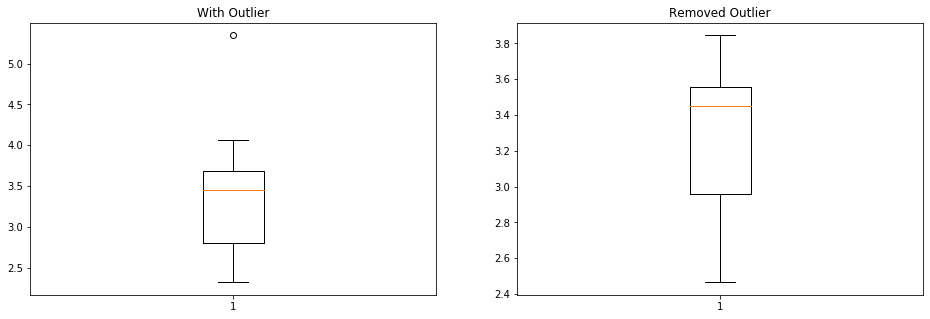

In [58]:
figure, ax = plt.subplots(1,2,figsize=(16,5))

ax[0].boxplot(X);
ax[1].boxplot(X[removed_outliers]);

ax[0].set_title("With Outlier")
ax[1].set_title("Removed Outlier")

In [59]:
df['clean_ol_wt'] = X[removed_outliers]

In [60]:
df.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,clean_ol_mpg,clean_ol_hp,clean_ol_wt
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,21.0,110.0,2.620
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.0,110.0,2.875
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8,93.0,NaN
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,21.4,110.0,3.215
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8,93.0,NaN


In [61]:
df.dropna(axis=0,how='any',inplace=True)

In [63]:
df.isnull().sum()

car_model       0
mpg             0
cyl             0
disp            0
hp              0
drat            0
wt              0
qsec            0
vs              0
am              0
gear            0
carb            0
clean_ol_mpg    0
clean_ol_hp     0
clean_ol_wt     0
dtype: int64

In [64]:
X = df[['clean_ol_hp','clean_ol_wt']]
y = df.clean_ol_mpg

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12, 2), (6, 2), (12,), (6,))

In [66]:
model=LinearRegression()

In [67]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_predict = model.predict(X_test)

In [69]:
r2_score(y_test,y_predict)*100

93.59993710920772